<h1>TAREA 7</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<p>Implementar y evaluar el algoritmo de dilatación direccional.</p>


<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

In [1]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division

print "Listo"


Listo


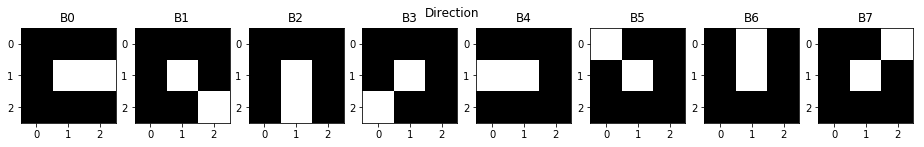

In [6]:
def createDirection():
    
    
    kernelDir = np.array([[0,0,0],[0,1,1],[0,0,0]], int)
    kernelDir2 = np.array([[0,0,0],[0,1,0],[0,0,1]], int)
    
    rotation = []

    for i in range(8):
        rotation.append(np.zeros((3,3)))
        if(i % 2 == 0):            
            rotation[i] += kernelDir
            kernelDir = np.rot90(kernelDir,-1)        
        else:            
            rotation[i] += kernelDir2
            kernelDir2 = np.rot90(kernelDir2,-1)         

    return rotation

def dfun(c1,c2):
    pass
def dir_dil(img, a2 , B = 1, a = 1):
    ex = dfun(c1,c2)**2
    D = B*img*a2*np.exp(-ex)
    
#M = cv2.moments(img)
#cx = int(M['m10']/M['m00'])
#cy = int(M['m01']/M['m00'])

directions = createDirection()

plt.figure(2,figsize=(16,2))
plt.suptitle("Direction")
for i in range(8):
    plt.subplot(181+i), plt.imshow(directions[i], cmap=plt.cm.gray), plt.title('B'+str(i))
#print cx,cy

<h2>Punto 2</h2>

 <p> Implementar y evaluar el algoritmo de adelgazamiento por morfología matemática.<p>
<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

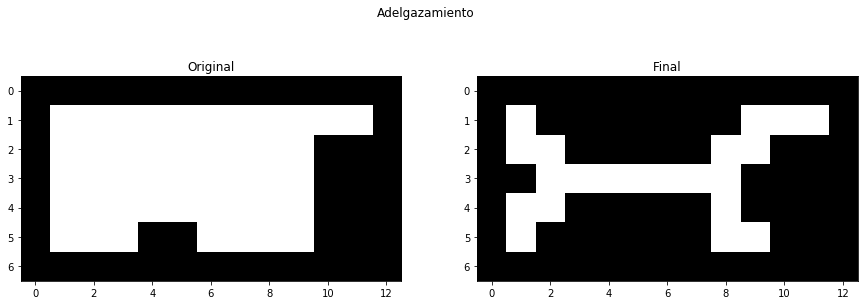

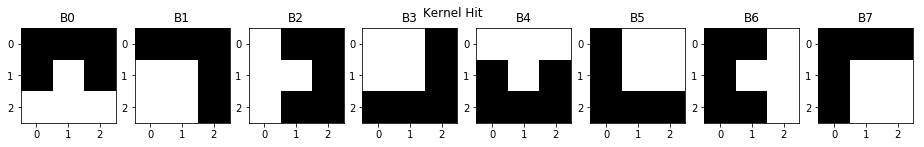

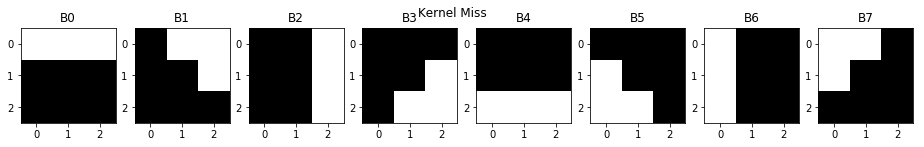

In [8]:
from scipy import ndimage

def createKernel():
    
    kernelhit = np.array([[0,0,0],[0,1,0],[1,1,1]], int)
    kernelhit2 = np.array([[0,0,0],[1,1,0],[1,1,0]], int)
    kernelmiss = np.array([[1,1,1],[0,0,0],[0,0,0]], int)
    kernelmiss2 = np.array([[0,1,1],[0,0,1],[0,0,0]], int)
    
    rotation = []
    rotationInv = []

    for i in range(8):
        rotation.append(np.zeros((3,3)))
        rotationInv.append(np.zeros((3,3)))
        if(i % 2 == 0):            
            rotation[i] += kernelhit
            kernelhit = np.rot90(kernelhit,-1)        
            rotationInv[i] += kernelmiss
            kernelmiss = np.rot90(kernelmiss,-1)
        else:            
            rotation[i] += kernelhit2
            kernelhit2 = np.rot90(kernelhit2,-1)         
            rotationInv[i] += kernelmiss2
            kernelmiss2 = np.rot90(kernelmiss2,-1)

    return rotation,rotationInv

def thinning(binary, rotation,rotationInv):
        
    res=np.zeros((binary.shape))
    plt.figure(1,figsize=(15,5))
    
    while True:
        actual=binary.copy()
        
        for i in range(8):  
            res = ndimage.binary_hit_or_miss(binary, structure1=rotation[i],structure2=rotationInv[i])
            binary =np.uint8(binary+res)
            
        if( not(np.bitwise_xor(actual,binary).any())):
            return binary
        
img = cv2.imread('Fig/prueba.png',0)
ret, original = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
rotation, rotationInv = createKernel()
skeleton=thinning(original,rotation,rotationInv)


plt.figure(1,figsize=(10,5))
plt.suptitle("Adelgazamiento")
plt.subplot(121), plt.imshow(original, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(122), plt.imshow(skeleton, cmap=plt.cm.gray), plt.title('Final')
plt.figure(2,figsize=(16,2))
plt.suptitle("Kernel Hit")
for i in range(8):
    plt.subplot(181+i), plt.imshow(rotation[i], cmap=plt.cm.gray), plt.title('B'+str(i))
plt.figure(3,figsize=(16,2))
plt.suptitle("Kernel Miss")
for i in range(8):
    plt.subplot(181+i), plt.imshow(rotationInv[i], cmap=plt.cm.gray), plt.title('B'+str(i))



(<matplotlib.axes._subplots.AxesSubplot at 0x4135e10>,
 <matplotlib.text.Text at 0x1bd4e9e8>)

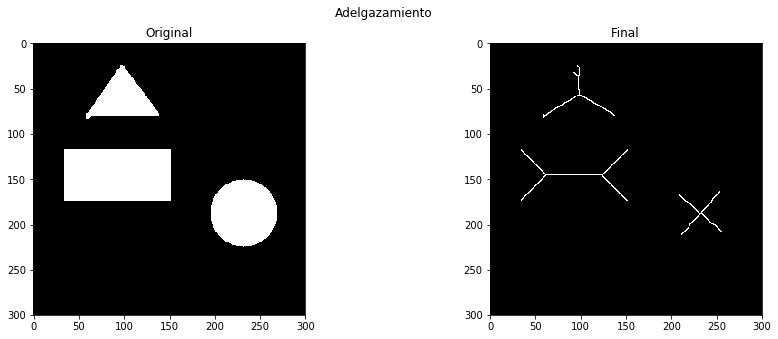

In [10]:
img2 = cv2.imread('Fig/prueba2.jpg',0)
ret, original2 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)
skeleton=thinning(original2,rotation,rotationInv)


plt.figure(1,figsize=(10,5))
plt.suptitle("Adelgazamiento")
plt.subplot(121), plt.imshow(original2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(122), plt.imshow(skeleton, cmap=plt.cm.gray), plt.title('Final')
